In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import numpy as np

In [2]:
class LeNetSquash(nn.Module):
    def __init__(self, constant=1.7159, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.constant = constant

    def forward(self, x):
        return self.constant * F.tanh(x)

def rbf_init_weight():
    bitmap = np.zeros((10,84))
    bitmap[0]=np.array([
        [-1, +1, +1, +1, +1, +1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, +1, +1, +1, -1, -1] + \
        [-1, +1, +1, -1, +1, +1, -1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [-1, +1, +1, -1, +1, +1, -1] + \
        [-1, -1, +1, +1, +1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] \
    ])
    bitmap[1]=np.array([
        [-1, -1, -1, +1, +1, -1, -1] + \
        [-1, -1, +1, +1, +1, -1, -1] + \
        [-1, +1, +1, +1, +1, -1, -1] + \
        [-1, -1, -1, +1, +1, -1, -1] + \
        [-1, -1, -1, +1, +1, -1, -1] + \
        [-1, -1, -1, +1, +1, -1, -1] + \
        [-1, -1, -1, +1, +1, -1, -1] + \
        [-1, -1, -1, +1, +1, -1, -1] + \
        [-1, -1, -1, +1, +1, -1, -1] + \
        [-1, +1, +1, +1, +1, +1, +1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] \
    ])
    bitmap[2]=np.array([
        [-1, +1, +1, +1, +1, +1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, +1, +1, +1, +1, +1, -1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, -1, -1, -1, -1, +1, +1] + \
        [-1, -1, -1, -1, +1, +1, -1] + \
        [-1, -1, +1, +1, +1, -1, -1] + \
        [-1, +1, +1, -1, -1, -1, -1] + \
        [+1, +1, -1, -1, -1, -1, -1] + \
        [+1, +1, +1, +1, +1, +1, +1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] \
    ])
    bitmap[3]=np.array([
        [+1, +1, +1, +1, +1, +1, +1] + \
        [-1, -1, -1, -1, -1, +1, +1] + \
        [-1, -1, -1, -1, +1, +1, -1] + \
        [-1, -1, -1, +1, +1, -1, -1] + \
        [-1, -1, +1, +1, +1, +1, -1] + \
        [-1, -1, -1, -1, -1, +1, +1] + \
        [-1, -1, -1, -1, -1, +1, +1] + \
        [-1, -1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [-1, +1, +1, +1, +1, +1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] \
    ])
    bitmap[4]=np.array([
        [-1, +1, +1, +1, +1, +1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, +1, +1, -1, -1, +1, +1] + \
        [-1, +1, +1, -1, -1, +1, +1] + \
        [+1, +1, +1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, +1, +1, +1] + \
        [-1, +1, +1, +1, +1, +1, +1] + \
        [-1, -1, -1, -1, -1, +1, +1] + \
        [-1, -1, -1, -1, -1, +1, +1] \
    ])
    bitmap[5]=np.array([
        [-1, +1, +1, +1, +1, +1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [+1, +1, +1, +1, +1, +1, +1] + \
        [+1, +1, -1, -1, -1, -1, -1] + \
        [+1, +1, -1, -1, -1, -1, -1] + \
        [-1, +1, +1, +1, +1, -1, -1] + \
        [-1, -1, +1, +1, +1, +1, -1] + \
        [-1, -1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [-1, +1, +1, +1, +1, +1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] \
    ])
    bitmap[6]=np.array([
        [-1, -1, +1, +1, +1, +1, -1] + \
        [-1, +1, +1, -1, -1, -1, -1] + \
        [+1, +1, -1, -1, -1, -1, -1] + \
        [+1, +1, -1, -1, -1, -1, -1] + \
        [+1, +1, +1, +1, +1, +1, -1] + \
        [+1, +1, +1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, +1, -1, -1, +1, +1] + \
        [-1, +1, +1, +1, +1, +1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] \
    ])
    bitmap[7]=np.array([
        [+1, +1, +1, +1, +1, +1, +1] + \
        [-1, -1, -1, -1, -1, +1, +1] + \
        [-1, -1, -1, -1, -1, +1, +1] + \
        [-1, -1, -1, -1, +1, +1, -1] + \
        [-1, -1, -1, +1, +1, -1, -1] + \
        [-1, -1, -1, +1, +1, -1, -1] + \
        [-1, -1, +1, +1, -1, -1, -1] + \
        [-1, -1, +1, +1, -1, -1, -1] + \
        [-1, -1, +1, +1, -1, -1, -1] + \
        [-1, -1, +1, +1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] \
    ])
    bitmap[8]=np.array([
        [-1, +1, +1, +1, +1, +1, -1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [-1, +1, +1, +1, +1, +1, -1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [-1, +1, +1, +1, +1, +1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] \
    ])
    bitmap[9]=np.array([
        [-1, +1, +1, +1, +1, +1, -1] + \
        [+1, +1, -1, -1, +1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, -1, +1, +1] + \
        [+1, +1, -1, -1, +1, +1, +1] + \
        [-1, +1, +1, +1, +1, +1, +1] + \
        [-1, -1, -1, -1, -1, +1, +1] + \
        [-1, -1, -1, -1, -1, +1, +1] + \
        [-1, -1, -1, -1, +1, +1, -1] + \
        [-1, +1, +1, +1, +1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] + \
        [-1, -1, -1, -1, -1, -1, -1] \
    ])
    return torch.from_numpy(bitmap).float()

class RBFLayer(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        pass

class LeNet(nn.Module):
    def __init__(self, num_classes=10, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.act = LeNetSquash()
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5,
            stride=1,
            padding=0,
        )
        self.conv2 = nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=0,
        )
        self.conv3 = nn.Conv2d(
            in_channels=16,
            out_channels=120,
            kernel_size=5,
            stride=1,
            padding=0,
        )
        self.fc1 = nn.Linear(120*1*1, 84)
        self.fc2 = nn.Linear(84, num_classes)
        # bitmap = rbf_init_weight()
        # self.fc2.weight.data = bitmap.data

    def forward(self, x):
        out = self.act(self.conv1(x))
        out = F.avg_pool2d(out, kernel_size=2, stride=2)
        out = self.act(self.conv2(out))
        out = F.avg_pool2d(out, kernel_size=2, stride=2)
        out = self.act(self.conv3(out))
        out = out.view(-1, 120*1*1)
        out = self.act(self.fc1(out))
        out = self.fc2(out)
        return out

In [3]:
model = LeNet()
for name, param in model.named_parameters():
    print(name, param.shape)

conv1.weight torch.Size([6, 1, 5, 5])
conv1.bias torch.Size([6])
conv2.weight torch.Size([16, 6, 5, 5])
conv2.bias torch.Size([16])
conv3.weight torch.Size([120, 16, 5, 5])
conv3.bias torch.Size([120])
fc1.weight torch.Size([84, 120])
fc1.bias torch.Size([84])
fc2.weight torch.Size([10, 84])
fc2.bias torch.Size([10])


In [4]:
sum([p.numel() for p in model.parameters()])

61706

In [5]:
x = torch.zeros([1, 1, 32, 32])

output = model.forward(x)
output.shape

torch.Size([1, 10])

In [6]:
test = torch.tensor([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]]).unsqueeze(0)
test[:, [0, 2], :]

tensor([[[1, 2, 3],
         [7, 8, 9]]])

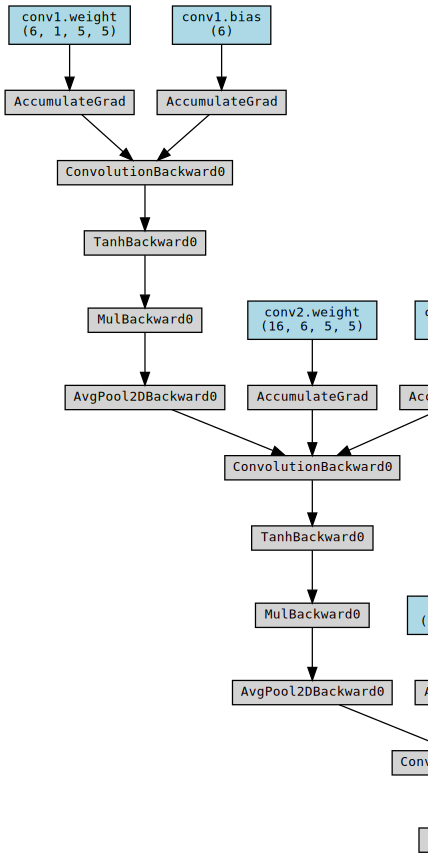

In [7]:
from torchviz import make_dot

make_dot(output, params=dict(model.named_parameters()))